This notebook covers the content on linear regression presented for the session held on linear regression to the Data Science East Africa community.

The notebook uses data that was manually scrapped on sbtjapan.com using webscrapping for the vitz car.

Goals :
1. Data exploration
2. Model building
3. Parameter tuning and/or feature engineering
  - Linear regression

4. Saving the model
5. Building an api to consume on the frontend 
6. Building a simple html page to query the model


# Load the data

The data we saved from webscrapping is in a json file. 

In [755]:
#  import libraries
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd


Read the data using pandas. We use the records as our orient. The orient indicated the expected string format. The records means the data is in the form of a list as shown : 

```
[{column -> value}, ... , {column -> value}]

```

You can read more on other compatible formats here : [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)



In [756]:
df = pd.read_json("/content/final.json", orient="records")

In [757]:
df.head().T

,0,1,2,3,4
title,TOYOTA VITZ 2017/7 F,TOYOTA VITZ 2017/6 F,TOYOTA VITZ 2016/1 JEWELA,TOYOTA VITZ 2016/6 F,TOYOTA VITZ 2016/9 F LED EDITION
Stock Id:,AG3658,AO2321,BL2723,CC5205,CC5565
Inventory Location:,Yokohama - Japan,Hakata - Japan,Hakata - Japan,Kobe - Japan,Hakata - Japan
Model Code:,DBA-KSP130,DBA-KSP130,DBA-NSP130,DBA-KSP130,DBA-NSP130
Year:,2017/7,2017/6,2016/1,2016/6,2016/9
Transmission:,AT,AT,AT,AT,AT
Color:,Black,GRAY(D),Wine,White,Pearl
Drive:,2WD,2WD,2WD,2WD,2WD
Door:,5,5,5,5,5
Steering:,RHD,RHD,RHD,RHD,RHD


In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   252 non-null    object 
 1   Stock Id:               252 non-null    object 
 2   Inventory Location:     252 non-null    object 
 3   Model Code:             45 non-null     object 
 4   Year:                   45 non-null     object 
 5   Transmission:           252 non-null    object 
 6   Color:                  252 non-null    object 
 7   Drive:                  252 non-null    object 
 8   Door:                   252 non-null    object 
 9   Steering:               252 non-null    object 
 10  Seats:                  45 non-null     object 
 11  Engine Type:            45 non-null     object 
 12  Body Type:              252 non-null    object 
 13  Engine Size:            252 non-null    object 
 14  Mileage:                252 non-null    ob

We have a total of 252 items on the dataset with 48 features. 

The summary given above shows that some columns have categorical data while others have a mix of categorical and numeric.



#  Data Wrangling

Data wrangling also referes to as data  cleanining, data remediation or data minging is the process of transforming raw data to formats that can be useful for modelling.

---
With a general overview of the dataset, we can now go deeper and explore the dataset

From the summary we got, it is clear that the dataset has very many null values. We need to figure out how to go about this.



## Numeric features dealing with null values
Starting with the columns that have numeric features : 

In [759]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Air Bag', 'Anti-Lock Brake System', 'Air Conditioner', 'Navigation',
       'Power Steering', 'Power Windows', 'Navigation System', 'TV',
       'Dual Air Bags', 'Anti-Lock Brake', 'CD', 'Back Camera',
       'Key Less Entry', 'Alloy Wheels', 'Fog Lights', 'Auto Air Conditioner',
       'Aero', 'HID', 'Centralized Door Lock', 'Push Start', 'Spare Key',
       'LED', 'Steering Switch'],
      dtype='object')

In [760]:
numeric_features.head()

,Air Bag,Anti-Lock Brake System,Air Conditioner,Navigation,Power Steering,Power Windows,Navigation System,TV,Dual Air Bags,Anti-Lock Brake,...,Alloy Wheels,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch
0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the webscrapping, we had saved the accssories of a car as boolean values. On exporting to Json however, the truth values were converted to a float 1.0. For cars that did not have that specific accessory, the value assigned was a null. Thus a null in this case would mean the vehicle does not have that accessory. To maintain the float point system, we will convert the null values to a 0.0. 

Therefore, a 1.0 means true while a 0.0 means false. True means the car has the featurw while false means the car doesnt have the feature.

In [761]:
# replace the null values with 0.0 for the numeric features

df[numeric_features.columns] = df[numeric_features.columns].fillna(value=0.0)

In [762]:
df.head()

,title,Stock Id:,Inventory Location:,Model Code:,Year:,Transmission:,Color:,Drive:,Door:,Steering:,...,Alloy Wheels,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch
0,TOYOTA VITZ 2017/7 F,AG3658,Yokohama - Japan,DBA-KSP130,2017/7,AT,Black,2WD,5,RHD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TOYOTA VITZ 2017/6 F,AO2321,Hakata - Japan,DBA-KSP130,2017/6,AT,GRAY(D),2WD,5,RHD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TOYOTA VITZ 2016/1 JEWELA,BL2723,Hakata - Japan,DBA-NSP130,2016/1,AT,Wine,2WD,5,RHD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TOYOTA VITZ 2016/6 F,CC5205,Kobe - Japan,DBA-KSP130,2016/6,AT,White,2WD,5,RHD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TOYOTA VITZ 2016/9 F LED EDITION,CC5565,Hakata - Japan,DBA-NSP130,2016/9,AT,Pearl,2WD,5,RHD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



## Categorical features dealing with null values

Categorical features are those that are in the form of strings.

In [763]:
df_categorical = df.select_dtypes(include=['object'])

In [764]:
df_categorical.columns.tolist()

['title',
 'Stock Id:',
 'Inventory Location:',
 'Model Code:',
 'Year:',
 'Transmission:',
 'Color:',
 'Drive:',
 'Door:',
 'Steering:',
 'Seats:',
 'Engine Type:',
 'Body Type:',
 'Engine Size:',
 'Mileage:',
 'Fuel:',
 'Body Length:',
 'Vehicle Weight:',
 'Gross Vehicle Weight:',
 'Max Loading Capacity:',
 'price',
 'Model:',
 'Registration Year:',
 'Model Year:',
 'Seating Capacity:',
 'Chassis Number']

In [765]:
df_categorical.tail(100)

,title,Stock Id:,Inventory Location:,Model Code:,Year:,Transmission:,Color:,Drive:,Door:,Steering:,...,Body Length:,Vehicle Weight:,Gross Vehicle Weight:,Max Loading Capacity:,price,Model:,Registration Year:,Model Year:,Seating Capacity:,Chassis Number
152,TOYOTA VITZ 2017/8 F Mパッケージ,DTC9656,Tokyo - Japan,NaN,NaN,AT,SILVER,,5,Right,...,NaN,NaN,NaN,NaN,"USD 11,484",VITZ,2017/8,,5,KSP130-2209***
153,TOYOTA VITZ 2017/4 F,DTD2362,Ishikawa - Japan,NaN,NaN,AT,BLACK,4WD,5,Right,...,NaN,NaN,NaN,NaN,"USD 9,797",VITZ,2017/4,,5,NSP135-2070***
154,TOYOTA VITZ 2017/8 1.0F,DTD4662,Kumamoto - Japan,NaN,NaN,AT,GRAY,,5,Right,...,NaN,NaN,NaN,NaN,"USD 7,686",VITZ,2017/8,,5,KSP130-2210***
155,TOYOTA VITZ 2017/4,DTF2556,Mie - Japan,NaN,NaN,,BLACK,Other,,Right,...,NaN,NaN,NaN,NaN,"USD 8,383",VITZ,2017/4,,,KSP130-2200***
156,TOYOTA VITZ 2018/9 F,DTJ9525,Miyagi - Japan,NaN,NaN,AT,BLACK,,5,Right,...,NaN,NaN,NaN,NaN,"USD 10,332",VITZ,2018/9,,5,KSP130-2244***
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,TOYOTA VITZ 2016/1 F,YG5692,Kobe - Japan,DBA-NSP130,2016/1,AT,White,2WD,5,RHD,...,3.88m,"1,000kg","1,275kg",- kg,"USD 5,999",NaN,NaN,NaN,NaN,NaN
248,TOYOTA VITZ 2017/6 F,YO1805,Hakata - Japan,DBA-KSP130,2017/6,AT,GRAY(D),2WD,5,RHD,...,3.94m,970kg,"1,245kg",- kg,"USD 6,525",NaN,NaN,NaN,NaN,NaN
249,TOYOTA VITZ 2017/7 F,YR9773,Yokohama - Japan,DBA-KSP130,2017/7,AT,Black,2WD,5,RHD,...,3.94m,970kg,"1,245kg",- kg,"USD 6,706",NaN,NaN,NaN,NaN,NaN
250,TOYOTA VITZ 2017/3 F,ZE0283,Hakata - Japan,DBA-KSP130,2017/3,AT,GRAY(D),2WD,5,RHD,...,3.94m,970kg,"1,245kg",- kg,"USD 6,161",NaN,NaN,NaN,NaN,NaN


### Stock id

All vehicles have a stock id which is simply an identifier and doesnt affect the price of a car. Thus, we will drop this column

In [766]:
df.drop('Stock Id:', axis = 1, inplace = True)

In [767]:
df.head(2)

,title,Inventory Location:,Model Code:,Year:,Transmission:,Color:,Drive:,Door:,Steering:,Seats:,...,Alloy Wheels,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch
0,TOYOTA VITZ 2017/7 F,Yokohama - Japan,DBA-KSP130,2017/7,AT,Black,2WD,5,RHD,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TOYOTA VITZ 2017/6 F,Hakata - Japan,DBA-KSP130,2017/6,AT,GRAY(D),2WD,5,RHD,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Inventory location

Does the location of the car affect its price? Without looking at the data, we would hypothesize that it does since the further away from the port a city , the overheads are greater to get it to port. As such, we will keep this feature.

In [768]:
df['Inventory Location:'].describe()

count                252
unique                42
top       Hakata - Japan
freq                  24
Name: Inventory Location:, dtype: object

We do not have any missing values, however we need to ensure that every location os represented once. For example pandas will take  Hakata - Japan and  hakata - Japan as two distinct locations


In [769]:
locations = df['Inventory Location:'].unique() 

In [770]:
locations

array(['Yokohama - Japan', 'Hakata - Japan', 'Kobe - Japan',
       'Nagoya - Japan', 'Fukuoka - Japan', 'Mie - Japan',
       'Osaka - Japan', 'Chiba - Japan', 'Miyazaki - Japan',
       'Hiroshima - Japan', 'Aichi - Japan', 'Hokkaido - Japan',
       'Saitama - Japan', 'Hyogo - Japan', 'Tochigi - Japan',
       'Miyagi - Japan', 'Akita - Japan', 'Shimane - Japan',
       'Nagano - Japan', 'Okayama - Japan', 'Tokyo - Japan',
       'Kyoto - Japan', 'Shizuoka - Japan', 'Tottori - Japan',
       'Kumamoto - Japan', 'Ishikawa - Japan', 'Gunma - Japan',
       'Niigata - Japan', 'Iwate - Japan', 'Nara - Japan',
       'Yamanashi - Japan', 'Aomori - Japan', 'Fukui - Japan',
       'Kanagawa - Japan', 'Ibaraki - Japan', 'Kagoshima - Japan',
       'Ehime - Japan', 'Shiga - Japan', 'Toyama - Japan',
       'Kagawa - Japan', 'Yamagata - Japan', 'Gifu - Japan'], dtype=object)

One way to verify this would be to turn everything to lowercase

In [771]:
locations_lower = [x.lower() for x in locations]

In [772]:
locations_lower

['yokohama - japan',
 'hakata - japan',
 'kobe - japan',
 'nagoya - japan',
 'fukuoka - japan',
 'mie - japan',
 'osaka - japan',
 'chiba - japan',
 'miyazaki - japan',
 'hiroshima - japan',
 'aichi - japan',
 'hokkaido - japan',
 'saitama - japan',
 'hyogo - japan',
 'tochigi - japan',
 'miyagi - japan',
 'akita - japan',
 'shimane - japan',
 'nagano - japan',
 'okayama - japan',
 'tokyo - japan',
 'kyoto - japan',
 'shizuoka - japan',
 'tottori - japan',
 'kumamoto - japan',
 'ishikawa - japan',
 'gunma - japan',
 'niigata - japan',
 'iwate - japan',
 'nara - japan',
 'yamanashi - japan',
 'aomori - japan',
 'fukui - japan',
 'kanagawa - japan',
 'ibaraki - japan',
 'kagoshima - japan',
 'ehime - japan',
 'shiga - japan',
 'toyama - japan',
 'kagawa - japan',
 'yamagata - japan',
 'gifu - japan']

Next we check if we have duplicates using sets.

In [773]:
set([loc for loc in locations_lower if locations_lower.count(loc) > 1])

set()

Given that we do not have duplicates, we can further verify by just geeting the location and dropping the japan

In [774]:
cities = list(map(lambda st: str.replace(st, "- japan", ""), locations_lower))
cities

['yokohama ',
 'hakata ',
 'kobe ',
 'nagoya ',
 'fukuoka ',
 'mie ',
 'osaka ',
 'chiba ',
 'miyazaki ',
 'hiroshima ',
 'aichi ',
 'hokkaido ',
 'saitama ',
 'hyogo ',
 'tochigi ',
 'miyagi ',
 'akita ',
 'shimane ',
 'nagano ',
 'okayama ',
 'tokyo ',
 'kyoto ',
 'shizuoka ',
 'tottori ',
 'kumamoto ',
 'ishikawa ',
 'gunma ',
 'niigata ',
 'iwate ',
 'nara ',
 'yamanashi ',
 'aomori ',
 'fukui ',
 'kanagawa ',
 'ibaraki ',
 'kagoshima ',
 'ehime ',
 'shiga ',
 'toyama ',
 'kagawa ',
 'yamagata ',
 'gifu ']

In [775]:
cities = [x.strip(' ') for x in cities]
cities

['yokohama',
 'hakata',
 'kobe',
 'nagoya',
 'fukuoka',
 'mie',
 'osaka',
 'chiba',
 'miyazaki',
 'hiroshima',
 'aichi',
 'hokkaido',
 'saitama',
 'hyogo',
 'tochigi',
 'miyagi',
 'akita',
 'shimane',
 'nagano',
 'okayama',
 'tokyo',
 'kyoto',
 'shizuoka',
 'tottori',
 'kumamoto',
 'ishikawa',
 'gunma',
 'niigata',
 'iwate',
 'nara',
 'yamanashi',
 'aomori',
 'fukui',
 'kanagawa',
 'ibaraki',
 'kagoshima',
 'ehime',
 'shiga',
 'toyama',
 'kagawa',
 'yamagata',
 'gifu']

In [776]:
set([loc for loc in cities if cities.count(loc) > 1])

set()

Now that we are sure we do not have duplicates we can replace the initial features with the cities values

In [777]:
df['Inventory Location:'] = df['Inventory Location:'].replace(
    to_replace=locations, 
    value=cities)

In [778]:
df.head()

,title,Inventory Location:,Model Code:,Year:,Transmission:,Color:,Drive:,Door:,Steering:,Seats:,...,Alloy Wheels,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch
0,TOYOTA VITZ 2017/7 F,yokohama,DBA-KSP130,2017/7,AT,Black,2WD,5,RHD,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TOYOTA VITZ 2017/6 F,hakata,DBA-KSP130,2017/6,AT,GRAY(D),2WD,5,RHD,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TOYOTA VITZ 2016/1 JEWELA,hakata,DBA-NSP130,2016/1,AT,Wine,2WD,5,RHD,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TOYOTA VITZ 2016/6 F,kobe,DBA-KSP130,2016/6,AT,White,2WD,5,RHD,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TOYOTA VITZ 2016/9 F LED EDITION,hakata,DBA-NSP130,2016/9,AT,Pearl,2WD,5,RHD,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Code



In [779]:
df['Model Code:'].describe()

count             45
unique             3
top       DBA-KSP130
freq              27
Name: Model Code:, dtype: object

In [780]:
df['Model Code:'].isnull().sum().sum()

207

Out of 238 vehicles only 37 have a model code. This not enoguh data to go by and thus we drop this column

In [781]:
df.drop(['Model Code:'], axis = 1, inplace = True) 

In [782]:
df.head()

,title,Inventory Location:,Year:,Transmission:,Color:,Drive:,Door:,Steering:,Seats:,Engine Type:,...,Alloy Wheels,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch
0,TOYOTA VITZ 2017/7 F,yokohama,2017/7,AT,Black,2WD,5,RHD,5,1KR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TOYOTA VITZ 2017/6 F,hakata,2017/6,AT,GRAY(D),2WD,5,RHD,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TOYOTA VITZ 2016/1 JEWELA,hakata,2016/1,AT,Wine,2WD,5,RHD,5,1NR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TOYOTA VITZ 2016/6 F,kobe,2016/6,AT,White,2WD,5,RHD,5,1KR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TOYOTA VITZ 2016/9 F LED EDITION,hakata,2016/9,AT,Pearl,2WD,5,RHD,5,1NR,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Year

At this point we can create a utility function that gives more info on a columns

#### Utility function : Check column details

This function takes in a column and returns a description and the number of null values in the column

In [783]:
def check_column_details(column):
    """
    This function takes in a column and returns a description and the number of null values in the column
    """
    print(f'--------------------The description of {column}--------------------')
    print(df[column].describe())
    print(f'{column} has the following null values ')
    num_null = df[column].isnull().sum().sum()
    print(num_null)
 
  


In [784]:
check_column_details('Year:')

--------------------The description of Year:--------------------
count         45
unique        17
top       2017/3
freq          11
Name: Year:, dtype: object
Year: has the following null values 
207


The year column has very few values. However, the title contains the year of the vehcicle. The assumption made here is that the seller indicated the year in the title and omitted it in the year field

In [785]:
check_column_details('title')

--------------------The description of title--------------------
count                      252
unique                     180
top       TOYOTA VITZ 2017/3 F
freq                        12
Name: title, dtype: object
title has the following null values 
0


From the title we will extract all the years and if the year is not present we give the value zero

#### Utility function : Get year

Function takes in a string and extracts the year from the string. If the string contains an year the year is returned, if no year is found we return 0

In [786]:

import re

def get_year(title_with_year):
  """
  Function takes in a string and extracts the year from the string. 
  If the string contains an year the year is returned, if no year is found we return 0
  
  """
  year_string = re.findall('.*([1-3][0-9]{3})', title_with_year)
  
  if len(year_string) > 0 :
      return year_string[0]
  else :
      return '0'

   

In [787]:
get_year('TOYOTA VITZ 2022/3 F')

'2022'

In [788]:
# apply the function to column
df['Year_from_title'] = df['title'].apply(lambda t: get_year(t))

In [789]:
check_column_details('Year_from_title')

--------------------The description of Year_from_title--------------------
count      252
unique       5
top       2017
freq       109
Name: Year_from_title, dtype: object
Year_from_title has the following null values 
0


In [790]:
# check zeros in the year
df['Year_from_title'].value_counts()

2017    109
2018     62
2016     40
2019     37
2020      4
Name: Year_from_title, dtype: int64

Our hypothesis is thus true that the user indicated the year in the title of the vehicle. We can now drop the year column

In [791]:
df.drop(['Year:','title'], axis = 1, inplace = True)

### Transmission

There are ideally three modes of transmission 
1. Automatic
2. Manual
3. Semi-automatic

In [792]:
check_column_details('Transmission:')

--------------------The description of Transmission:--------------------
count     252
unique      4
top        AT
freq      231
Name: Transmission:, dtype: object
Transmission: has the following null values 
0


In [793]:
df['Transmission:'].value_counts()

AT     231
        12
MT       7
5MT      2
Name: Transmission:, dtype: int64

In [794]:
df['Transmission:'].unique()

array(['AT', '', 'MT', '5MT'], dtype=object)

Checking our transmission column we can see that there are 12 cars that do not have a mode of transmission. To deal with this we can make the assumption that most of the cars are automatic 

In [795]:
df['Transmission:'] = df["Transmission:"].replace('',"AT")

In [796]:
df['Transmission:'].unique()

array(['AT', 'MT', '5MT'], dtype=object)

In [797]:
df['Transmission:'].value_counts()

AT     243
MT       7
5MT      2
Name: Transmission:, dtype: int64

### Color

Does the color of a vehicle influence the purchasing decision? Certainly yes! 

In [798]:
check_column_details('Color:')

--------------------The description of Color:--------------------
count        252
unique        25
top       SILVER
freq          39
Name: Color:, dtype: object
Color: has the following null values 
0


#### Utility function : Value counts

Function prints value counts and the specific unique values in column

In [799]:
def get_value_counts(column):
  """
  Function prints value counts and the specific unique values in column
  """
  print(f'------------------------{column} value counts :-------------------------- ')
  print( df[column].value_counts())
  print(f'------------------------{column} unique values :------------------------- ')
  print(df[column].unique())

In [800]:
get_value_counts('Color:')

------------------------Color: value counts :-------------------------- 
SILVER       39
BLACK        38
PEARL        32
WHITE        23
BLUE         17
GRAY(D)      16
RED          14
GRAY         11
White        10
WINE          8
BLUE(D)       8
Black         8
Pearl         5
PURPLE(D)     4
YELLOW        3
PINK          3
              3
ORANGE        2
Gray          2
Blue(D)       1
Wine          1
PURPLE(L)     1
BLUE(L)       1
Red           1
Silver        1
Name: Color:, dtype: int64
------------------------Color: unique values :------------------------- 
['Black' 'GRAY(D)' 'Wine' 'White' 'Pearl' 'Blue(D)' 'SILVER' 'PINK'
 'PEARL' 'BLACK' 'YELLOW' 'WINE' 'BLUE' 'BLUE(D)' 'WHITE' 'GRAY' 'RED'
 'PURPLE(D)' 'PURPLE(L)' '' 'ORANGE' 'BLUE(L)' 'Gray' 'Red' 'Silver']


The color values that have a (D) mean dark. For example BLUE(D) means  Dark blue while BLUE(L) means light blue.

Since the naming convention is standard, we can leave the column as is

### Drive

In [801]:
check_column_details('Drive:')

--------------------The description of Drive:--------------------
count     252
unique      5
top          
freq      117
Name: Drive:, dtype: object
Drive: has the following null values 
0


In [802]:
get_value_counts('Drive:')

------------------------Drive: value counts :-------------------------- 
         117
FF        49
2WD       45
4WD       27
Other     14
Name: Drive:, dtype: int64
------------------------Drive: unique values :------------------------- 
['2WD' '' 'Other' 'FF' '4WD']


The four different types of drivetrain are :
1. all-wheel-drive (AWD), 
2. front wheel drive (FWD), 
3. rear wheel drive (RWD), 
4. 4 wheel drive (4WD)

In our example, it is not certain where most vehicles lie. Thus we drop this column

In [803]:
df.drop('Drive:', axis = 1, inplace = True)

### Door

In [804]:
check_column_details('Door:')

--------------------The description of Door:--------------------
count     252
unique      2
top         5
freq      239
Name: Door:, dtype: object
Door: has the following null values 
0


In [805]:
get_value_counts('Door:')

------------------------Door: value counts :-------------------------- 
5    239
      13
Name: Door:, dtype: int64
------------------------Door: unique values :------------------------- 
['5' '']


The specific vitz we are looking at has 5 door. Since all have 5 doors, we can drop the feature since all the vehicles have this factored in.

In [806]:
df.drop('Door:', axis = 1, inplace = True)

### Steering

In [807]:
check_column_details('Steering:')
get_value_counts('Steering:')

--------------------The description of Steering:--------------------
count       252
unique        3
top       Right
freq        205
Name: Steering:, dtype: object
Steering: has the following null values 
0
------------------------Steering: value counts :-------------------------- 
Right    205
RHD       45
           2
Name: Steering:, dtype: int64
------------------------Steering: unique values :------------------------- 
['RHD' 'Right' '']


When scraping, sbt japan had filtered the results according to geo location. Thus the vehicles we have are all assumably right hand drive. SO we can also drop this field.

In [808]:
df.drop('Steering:', axis = 1, inplace = True)

### Seats

In [809]:
check_column_details('Seats:')
get_value_counts('Seats:')

--------------------The description of Seats:--------------------
count     45
unique     2
top        5
freq      44
Name: Seats:, dtype: object
Seats: has the following null values 
207
------------------------Seats: value counts :-------------------------- 
5    44
      1
Name: Seats:, dtype: int64
------------------------Seats: unique values :------------------------- 
['5' '' nan]


We drop the seats column under the assumptions all vehicles  have 5 seats.

In [810]:
df.drop('Seats:', axis = 1, inplace = True)

### Engine Type and Engine Size

In [811]:
check_column_details('Engine Type:')
get_value_counts('Engine Type:')

--------------------The description of Engine Type:--------------------
count      45
unique      4
top       1KR
freq       26
Name: Engine Type:, dtype: object
Engine Type: has the following null values 
207
------------------------Engine Type: value counts :-------------------------- 
1KR        26
1NR        16
            2
1NZ-1LM     1
Name: Engine Type:, dtype: int64
------------------------Engine Type: unique values :------------------------- 
['1KR' '' '1NR' nan '1NZ-1LM']


In [812]:
check_column_details('Engine Size:')
get_value_counts('Engine Size:')

--------------------The description of Engine Size:--------------------
count         252
unique          8
top       1,000cc
freq           81
Name: Engine Size:, dtype: object
Engine Size: has the following null values 
0
------------------------Engine Size: value counts :-------------------------- 
1,000cc    81
1,300cc    69
1,500cc    57
990cc      26
1,320cc    16
996cc       1
1,496cc     1
1,490cc     1
Name: Engine Size:, dtype: int64
------------------------Engine Size: unique values :------------------------- 
['990cc' '1,000cc' '1,320cc' '1,300cc' '1,500cc' '996cc' '1,496cc'
 '1,490cc']


Since we have more incomplete data on the engine type, we will drop that column and keep the engine size which has no missing values


In [813]:
df.drop(['Engine Size:','Engine Type:'], axis = 1, inplace = True)

### Body type

In [814]:
check_column_details('Body Type:')
get_value_counts('Body Type:')

--------------------The description of Body Type:--------------------
count           252
unique            1
top       Hatchback
freq            252
Name: Body Type:, dtype: object
Body Type: has the following null values 
0
------------------------Body Type: value counts :-------------------------- 
Hatchback    252
Name: Body Type:, dtype: int64
------------------------Body Type: unique values :------------------------- 
['Hatchback']


We drop this value since all vehicles are of type hatchback

In [815]:
df.drop('Body Type:', axis=1,inplace=True)

### Mileage

#### Utility function : Merge utilities

Merge utility functions



In [816]:
def merge_utility(column):
  """
  Merge utility functions 
  """
  check_column_details(column)
  get_value_counts(column)

In [817]:
merge_utility('Mileage:')

--------------------The description of Mileage:--------------------
count          252
unique         226
top       28,000km
freq             5
Name: Mileage:, dtype: object
Mileage: has the following null values 
0
------------------------Mileage: value counts :-------------------------- 
28,000km     5
11,000km     3
40,000km     3
46,000km     3
102,000km    2
            ..
35,000km     1
23,000km     1
50,081km     1
35,900km     1
78,000km     1
Name: Mileage:, Length: 226, dtype: int64
------------------------Mileage: unique values :------------------------- 
['102,000km' '120,000km' '98,000km' '114,000km' '143,000km' '28,000km'
 '35,036km' '34,037km' '48,337km' '8,000km' '50,081km' '24,287km'
 '3,704km' '45,548km' '20,000km' '16,000km' '94,667km' '6,899km'
 '18,000km' '33,065km' '40,000km' '22,000km' '28,627km' '11,000km'
 '54,000km' '17,000km' '12,283km' '40,826km' '42,979km' '48,800km'
 '22,300km' '19,006km' '28,963km' '24,000km' '5,000km' '11,969km'
 '30,000km' '16,500km' '2

The mileage does not have any null values. However we need to extract the miles from the string

#### Utility function : Get number from string

Extract number from string

In [818]:
def get_numbers_from_string(string_to_extract):
  """
  Extract number from string
  """

  return int(''.join(filter(str.isdigit, string_to_extract)))

In [819]:
# get mileage

df['Mileage:'] = df['Mileage:'].apply(lambda m : get_numbers_from_string(m))

### Fuel

This variable describes the type of fuel used

In [820]:
merge_utility('Fuel:')

--------------------The description of Fuel:--------------------
count        252
unique         2
top       PETROL
freq         221
Name: Fuel:, dtype: object
Fuel: has the following null values 
0
------------------------Fuel: value counts :-------------------------- 
PETROL            221
HYBRID(PETROL)     31
Name: Fuel:, dtype: int64
------------------------Fuel: unique values :------------------------- 
['PETROL' 'HYBRID(PETROL)']


No null values 

### Body Length



In [821]:
merge_utility('Body Length:')

--------------------The description of Body Length:--------------------
count        45
unique        3
top       3.94m
freq         26
Name: Body Length:, dtype: object
Body Length: has the following null values 
207
------------------------Body Length: value counts :-------------------------- 
3.94m    26
3.88m    17
- m       2
Name: Body Length:, dtype: int64
------------------------Body Length: unique values :------------------------- 
['3.94m' '- m' '3.88m' nan]


The body length has too many missing values so we drop the feature. Also we assume that if the buyer was making a purchase decision based on body length or chasis type its factored in the year of manufacture.

In [822]:
df.drop('Body Length:',axis = 1, inplace = True)

### Vehicle Weight: ,Gross Vehicle Weight: and Max Loading Capacity:

In [823]:
merge_utility('Vehicle Weight:')


--------------------The description of Vehicle Weight:--------------------
count        45
unique        5
top       970kg
freq         26
Name: Vehicle Weight:, dtype: object
Vehicle Weight: has the following null values 
207
------------------------Vehicle Weight: value counts :-------------------------- 
970kg      26
1,000kg    11
1,010kg     5
- kg        2
1,100kg     1
Name: Vehicle Weight:, dtype: int64
------------------------Vehicle Weight: unique values :------------------------- 
['970kg' '- kg' '1,010kg' '1,000kg' nan '1,100kg']


In [824]:
merge_utility('Gross Vehicle Weight:')


--------------------The description of Gross Vehicle Weight:--------------------
count          45
unique          5
top       1,245kg
freq           26
Name: Gross Vehicle Weight:, dtype: object
Gross Vehicle Weight: has the following null values 
207
------------------------Gross Vehicle Weight: value counts :-------------------------- 
1,245kg    26
1,275kg    11
1,285kg     5
- kg        2
1,375kg     1
Name: Gross Vehicle Weight:, dtype: int64
------------------------Gross Vehicle Weight: unique values :------------------------- 
['1,245kg' '- kg' '1,285kg' '1,275kg' nan '1,375kg']


In [825]:
merge_utility('Max Loading Capacity:')

--------------------The description of Max Loading Capacity:--------------------
count       45
unique       1
top       - kg
freq        45
Name: Max Loading Capacity:, dtype: object
Max Loading Capacity: has the following null values 
207
------------------------Max Loading Capacity: value counts :-------------------------- 
- kg    45
Name: Max Loading Capacity:, dtype: int64
------------------------Max Loading Capacity: unique values :------------------------- 
['- kg' nan]


The three Vehicle Weight: ,Gross Vehicle Weight: and Max Loading Capacity: have very little data. Tius we drop all three while still making the same assumption we made for the above feature.

In [826]:
df.drop(['Vehicle Weight:', 'Max Loading Capacity:','Gross Vehicle Weight:'], axis = 1, inplace = True)


### Price

This is the target variable for our project .

In [827]:
merge_utility('price')

--------------------The description of price--------------------
count            252
unique           200
top       USD 11,938
freq               4
Name: price, dtype: object
price has the following null values 
0
------------------------price value counts :-------------------------- 
USD 11,938    4
USD 11,070    4
USD 6,343     3
USD 9,171     3
USD 7,747     3
             ..
USD 7,575     1
USD 13,201    1
USD 13,675    1
USD 11,645    1
USD 6,999     1
Name: price, Length: 200, dtype: int64
------------------------price unique values :------------------------- 
['USD 6,343' 'USD 6,595' 'USD 6,171' 'USD 5,474' 'USD 6,747' 'USD 9,403'
 'USD 11,433' 'USD 11,494' 'USD 10,524' 'USD 12,443' 'USD 13,120'
 'USD 11,938' 'USD 9,716' 'USD 12,332' 'USD 11,029' 'USD 7,828'
 'USD 15,059' 'USD 11,585' 'USD 10,221' 'USD 12,524' 'USD 8,868'
 'USD 23,735' 'USD 8,181' 'USD 12,423' 'USD 17,816' 'USD 15,908'
 'USD 12,029' 'USD 8,605' 'USD 7,767' 'USD 8,120' 'USD 9,171' 'USD 14,312'
 'USD 7,716' 'USD 

The price field is in the form of strings. We  need to clean this column to only remain with the price number

In [828]:
get_numbers_from_string('USD 8,939')

8939

In [829]:
# clean the column

df['price'] = df['price'].apply(lambda p: int(get_numbers_from_string(p)))

In [830]:
df['price'].head()

0    6343
1    6595
2    6171
3    5474
4    6747
Name: price, dtype: int64

### 'Model:',  'Registration Year:',  'Model Year:',  'Seating Capacity:', 'Chassis Number'

In [831]:
feat = ['Model:', 'Registration Year:', 'Model Year:', 'Seating Capacity:', 'Chassis Number']

for f in feat:
    merge_utility(f)

--------------------The description of Model:--------------------
count      207
unique       1
top       VITZ
freq       207
Name: Model:, dtype: object
Model: has the following null values 
45
------------------------Model: value counts :-------------------------- 
VITZ    207
Name: Model:, dtype: int64
------------------------Model: unique values :------------------------- 
[nan 'VITZ']
--------------------The description of Registration Year:--------------------
count        207
unique        51
top       2017/3
freq          17
Name: Registration Year:, dtype: object
Registration Year: has the following null values 
45
------------------------Registration Year: value counts :-------------------------- 
2017/3     17
2019/3      9
2017/4      9
2017/2      9
2018/3      8
2016/6      7
2018/12     7
2018/1      7
2017/6      7
2017/12     7
2018/5      6
2017/1      6
2017/5      6
2019/7      5
2018/11     5
2017/7      5
2019/4      5
2016/3      5
2018/10     5
2018/7      5
201

We drop the three features on the following assumptions :

1. The model is a vitz for all cars since we only scraped the v itz data
2. The registration year is the same as the year we extracted from the title
3. The chasis number doesnt influence the price of a car since it is a unique identifier alloted by the manufaturer
4. All vehicles have the same sitting capacity

In [832]:
df.drop(feat,axis = 1, inplace = True)


In [833]:
df.head()

,Inventory Location:,Transmission:,Color:,Mileage:,Fuel:,Air Bag,Anti-Lock Brake System,Air Conditioner,Navigation,Power Steering,...,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch,Year_from_title
0,yokohama,AT,Black,102000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
1,hakata,AT,GRAY(D),120000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
2,hakata,AT,Wine,98000,PETROL,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,kobe,AT,White,114000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,hakata,AT,Pearl,143000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016


### Preprocessing class

 Merging utility functions into a data cleaning class

In [834]:
class DataWrangling:

    def __init__(self, column=None , title_with_year=None , string_to_extract=None) :
        self.column = column
        self.title_with_year = title_with_year
        self.string_to_extract = string_to_extract
        

    def check_column_details(self):
        """
        This function takes in a column and returns a description and the number of null values in the column
        """        
        print(f'--------------------The description of {self.column}--------------------')
        print(df[self.column].describe())
        print(f'{self.column} has the following null values ')
        num_null = df[self.column].isnull().sum().sum()
        print(num_null)


    def get_year(self):
        """
        Function takes in a string and extracts the year from the string. 
        If the string contains an year the year is returned, if no year is found we return 0
        
        """
        year_string = re.findall('.*([1-3][0-9]{3})', self.title_with_year)
        
        if len(year_string) > 0 :
            return year_string[0]
        else :
            return '0'

   
    def get_value_counts(self):
        """
        Function prints value counts and the specific unique values in column
        """
        print(f'------------------------{self.column} value counts :-------------------------- ')
        print( df[self.column].value_counts())
        print(f'------------------------{self.column} unique values :------------------------- ')
        print(df[self.column].unique())


    def get_numbers_from_string(self):
        """
        Extract number from string
        """
        return int(''.join(filter(str.isdigit, self.string_to_extract)))




# EDA

Exploratory Data Analysis in full. EDA is the process of investigating the data to spot anomalies, discover patterns, test hypothesis with the help of summary statistics and graphical representations



---

Sample hypothesis:

1. Automatic cars are more expensive than manual

2. More petrol vehicles are sold than diesel vehicles (The science now tells us that diesel vehicles cause more than four times the pollution than petrol cars.)




Distribution of x over y. For example:

How many vehicles are manual in the year 2017 



In [835]:
import matplotlib.pyplot as plt
import seaborn as sns

In [836]:
def get_distribution(x,y,h):
    """
    Function takes in three columns with which to plot a barplot
    """
    plt.figure(figsize=(12,6))
    sns.barplot(data=df,y=y,x=x,hue=h)
    plt.xlabel(x.capitalize(),size=15,c="r")
    plt.ylabel(y.capitalize(),size=15,c="r")
    plt.title(f"Effect of {h.lower()}  on {y.lower()} for {x.lower()}",size=25,c="red")
    plt.show()

In [837]:
df.head()

,Inventory Location:,Transmission:,Color:,Mileage:,Fuel:,Air Bag,Anti-Lock Brake System,Air Conditioner,Navigation,Power Steering,...,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch,Year_from_title
0,yokohama,AT,Black,102000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
1,hakata,AT,GRAY(D),120000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
2,hakata,AT,Wine,98000,PETROL,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,kobe,AT,White,114000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,hakata,AT,Pearl,143000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016


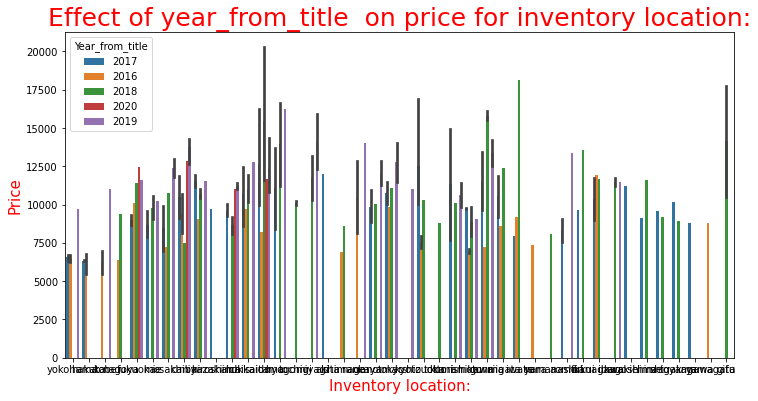

In [838]:
get_distribution('Inventory Location:','price','Year_from_title')

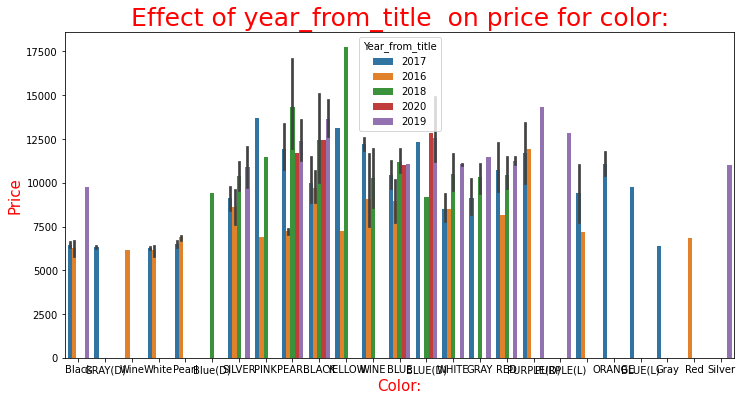

In [839]:
get_distribution('Color:','price','Year_from_title')

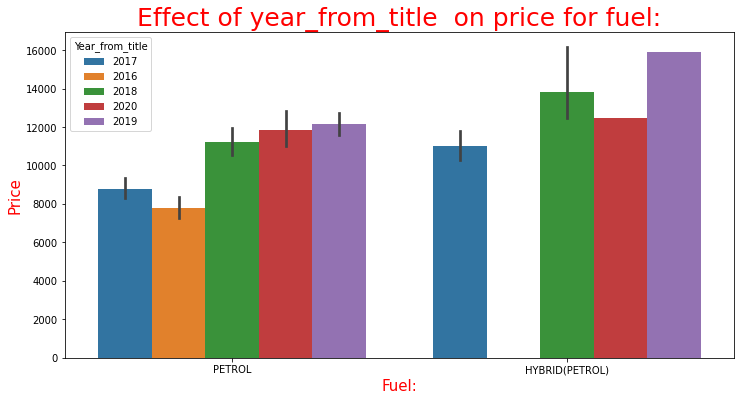

In [840]:
get_distribution('Fuel:','price','Year_from_title')

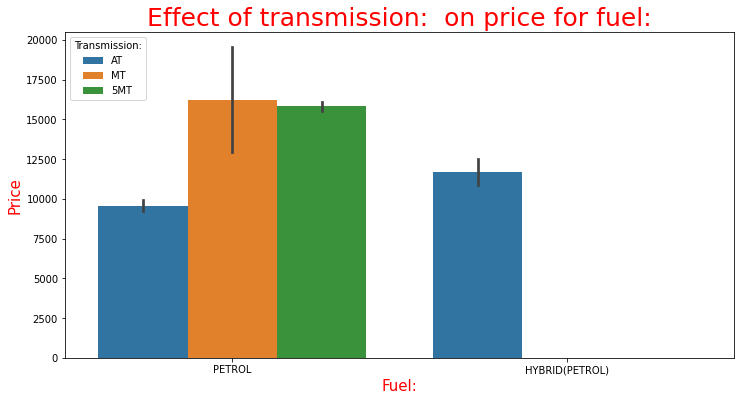

In [841]:
get_distribution('Fuel:','price','Transmission:')

## Encoding

We have dealt with the null values now we need to convert all our remaining columns to numbers. This would mean that values that are represented as strings are encoded with numbers. In this case we go with nominal encoding since the data has no particular order to it. 

In [842]:
df.head()

,Inventory Location:,Transmission:,Color:,Mileage:,Fuel:,Air Bag,Anti-Lock Brake System,Air Conditioner,Navigation,Power Steering,...,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch,Year_from_title
0,yokohama,AT,Black,102000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
1,hakata,AT,GRAY(D),120000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017
2,hakata,AT,Wine,98000,PETROL,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,kobe,AT,White,114000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
4,hakata,AT,Pearl,143000,PETROL,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016


The categorical variables can be encoded using the label encoder from scikit learn

In [843]:
categorical_cols = df.select_dtypes(include=['object']).columns.values

categorical_cols

array(['Inventory Location:', 'Transmission:', 'Color:', 'Fuel:',
       'Year_from_title'], dtype=object)

In [844]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [845]:
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col)) 

In [846]:
df.head()

,Inventory Location:,Transmission:,Color:,Mileage:,Fuel:,Air Bag,Anti-Lock Brake System,Air Conditioner,Navigation,Power Steering,...,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch,Year_from_title
0,41,1,5,102000,1,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,9,1,8,120000,1,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,9,1,23,98000,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,19,1,22,114000,1,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,9,1,15,143000,1,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [847]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Inventory Location:     252 non-null    int64  
 1   Transmission:           252 non-null    int64  
 2   Color:                  252 non-null    int64  
 3   Mileage:                252 non-null    int64  
 4   Fuel:                   252 non-null    int64  
 5   Air Bag                 252 non-null    float64
 6   Anti-Lock Brake System  252 non-null    float64
 7   Air Conditioner         252 non-null    float64
 8   Navigation              252 non-null    float64
 9   Power Steering          252 non-null    float64
 10  Power Windows           252 non-null    float64
 11  price                   252 non-null    int64  
 12  Navigation System       252 non-null    float64
 13  TV                      252 non-null    float64
 14  Dual Air Bags           252 non-null    fl

Our target variable is the price and we need to ensure our model works with data that is well distributed as outliers can ifluence the quality of our results

## Outliers

An outlier is a data point that differs significantly from other observations. Boxplots show the interquartile distribution of the data and can thus help identify the occurence of outliers.



In [848]:
def get_many_distplots(cols):
     # Subplots are organized in a Rows x Cols Grid
    Tot = len(cols)
    Cols = 1
    # Compute Rows required // returns the division without the floating point values 
    print("The total now is ",Tot)
    Rows = Tot // Cols 
    print("After double slash division we get the whole number bit ", Rows)
    Rows += Tot % Cols
    print("The row now added to the modulus is ", Rows, Tot % Cols )
    plt.figure(figsize=(20,80))
    for i,v in enumerate(cols):
      # add every single subplot to the figure with a for loop
      plt.subplot(Rows,Cols,i+1)
      b = sns.boxplot(x=v, data=df,color='green')    
      b.axes.set_title(v ,fontsize=10)
    plt.show()


In [849]:
df.columns.values

array(['Inventory Location:', 'Transmission:', 'Color:', 'Mileage:',
       'Fuel:', 'Air Bag', 'Anti-Lock Brake System', 'Air Conditioner',
       'Navigation', 'Power Steering', 'Power Windows', 'price',
       'Navigation System', 'TV', 'Dual Air Bags', 'Anti-Lock Brake',
       'CD', 'Back Camera', 'Key Less Entry', 'Alloy Wheels',
       'Fog Lights', 'Auto Air Conditioner', 'Aero', 'HID',
       'Centralized Door Lock', 'Push Start', 'Spare Key', 'LED',
       'Steering Switch', 'Year_from_title'], dtype=object)

The total now is  30
After double slash division we get the whole number bit  30
The row now added to the modulus is  30 0


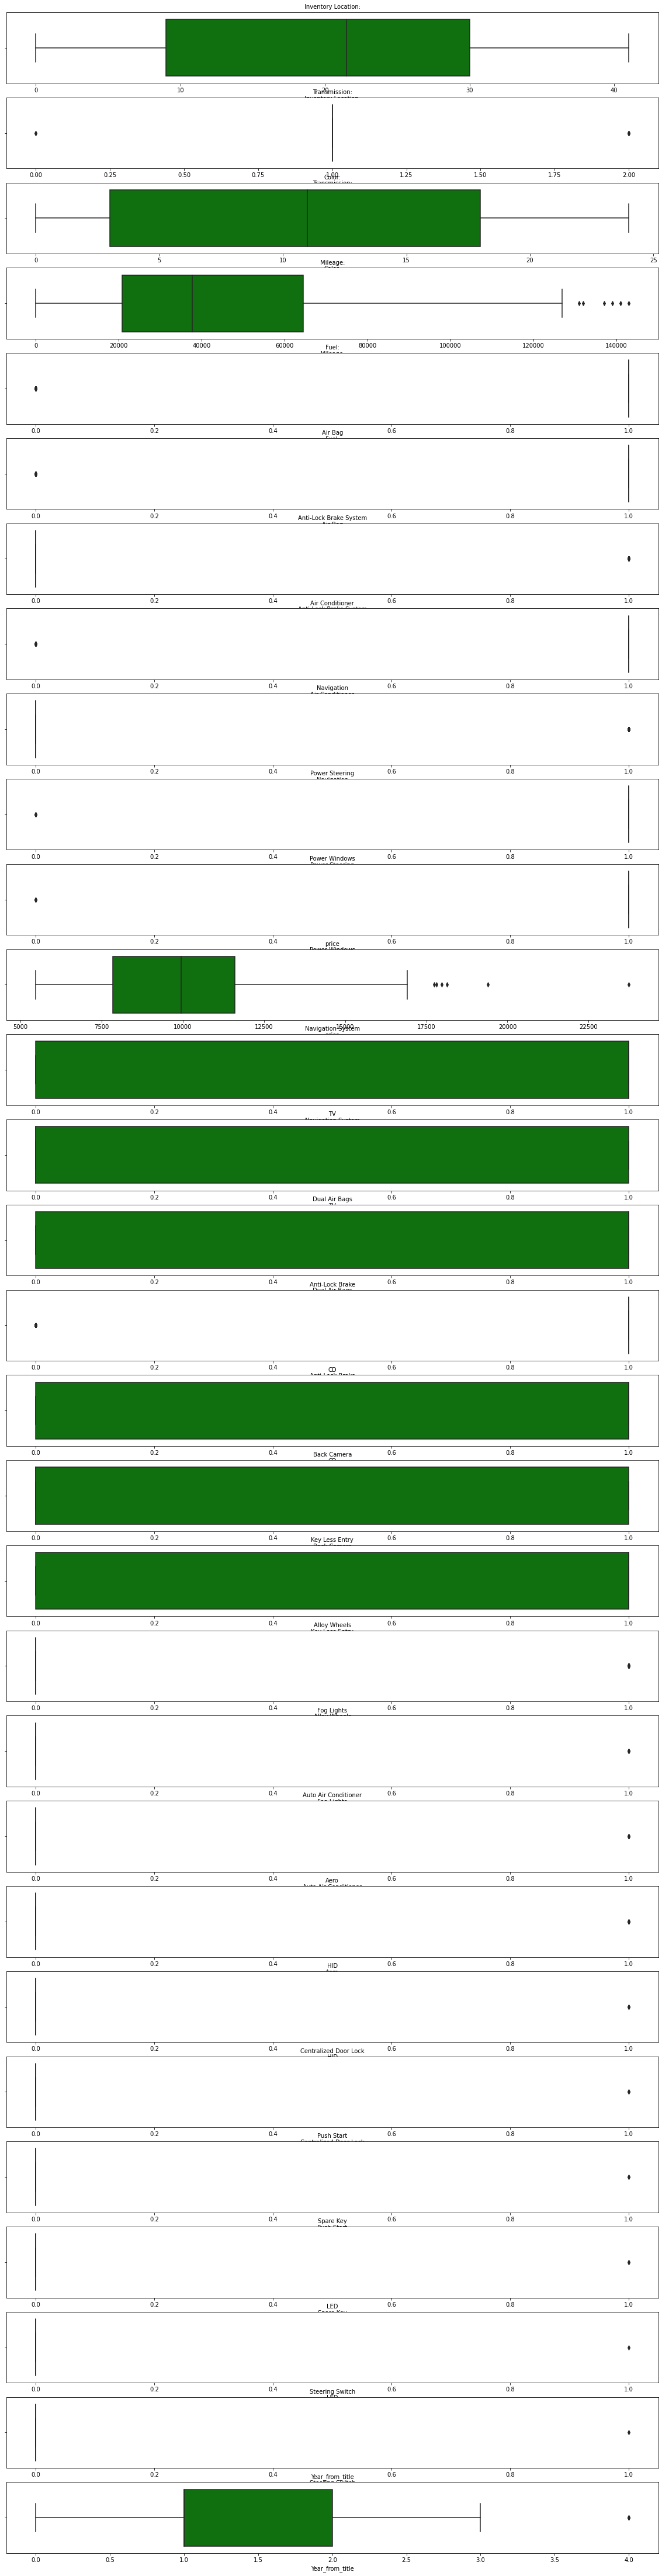

In [850]:
get_many_distplots(df.columns.values)

From inspecting the above boxplots we can see we do have outliers in the price column

In [851]:
df['price'].describe()

count      252.000000
mean     10052.170635
std       2843.481338
min       5474.000000
25%       7843.000000
50%       9943.500000
75%      11597.500000
max      23735.000000
Name: price, dtype: float64

In [852]:
def get_distplot(col):
    sns.distplot(x=col, color='r')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


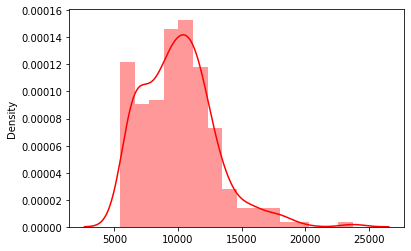

In [853]:
get_distplot(df['price'])

In [854]:
df['price'][df['price'] >=11597.500000 ].count()

63

In [855]:
df['Mileage:'].describe()

count       252.000000
mean      45826.694444
std       32869.732703
min           5.000000
25%       20748.750000
50%       37741.500000
75%       64540.000000
max      143000.000000
Name: Mileage:, dtype: float64

In [856]:
df['Mileage:'][df['Mileage:'] >= 64540.000000 ].count()

63

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


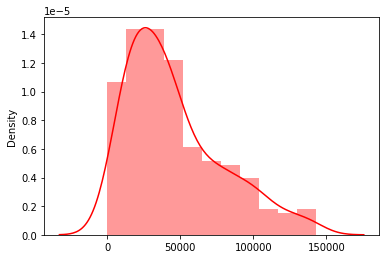

In [857]:
get_distplot(df['Mileage:'])

In [858]:
df['Year_from_title'].describe()

count    252.000000
mean       1.428571
std        0.977260
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Year_from_title, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


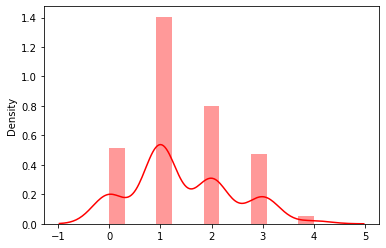

In [859]:
get_distplot(df['Year_from_title'])

In [860]:
df['Year_from_title'][df['Year_from_title'] >= 2 ].count()

103

We ought to deal with the outliers in the price and mileage\

However something to note is that the number of outlier in both columns are so great we cannot just drop the columns. 

Going withe median imputation


In [861]:
def median_imputation(col):
    med = df[col].median()
    q4 = df[col].quantile(0.75)
    print(f"The median for {col} is {med} while the q4 is {q4}")
    # df[col] = df[col].apply(lambda c : )
    df.loc[df[col] > q4, col] = med 
    print(df[col].describe())

In [862]:
median_imputation('price')

The median for price is 9943.5 while the q4 is 11597.5
count      252.000000
mean      9113.287698
std       1592.410894
min       5474.000000
25%       7843.000000
50%       9935.750000
75%       9947.375000
max      11585.000000
Name: price, dtype: float64


In [863]:
median_imputation('Mileage:')

The median for Mileage: is 37741.5 while the q4 is 64540.0
count      252.000000
mean     31734.740079
std      14101.235468
min          5.000000
25%      20748.750000
50%      37612.250000
75%      37806.125000
max      64220.000000
Name: Mileage:, dtype: float64


## Correlation

Correlation shows the relationship betweem two or more things. We need to only use highly correlated features. 

In [864]:
most_corr = df.corr()

In [865]:
most_corr

,Inventory Location:,Transmission:,Color:,Mileage:,Fuel:,Air Bag,Anti-Lock Brake System,Air Conditioner,Navigation,Power Steering,...,Fog Lights,Auto Air Conditioner,Aero,HID,Centralized Door Lock,Push Start,Spare Key,LED,Steering Switch,Year_from_title
Inventory Location:,1.000000,0.025016,0.065465,-0.025173,0.003093,-0.097643,0.056936,-0.005092,0.033477,-0.033268,...,0.028969,-0.017666,-0.065395,-0.055111,-0.144308,-0.144308,-0.144308,-0.101838,-0.101838,-0.061914
Transmission:,0.025016,1.000000,-0.137357,-0.076390,0.039540,0.041693,-0.049224,0.205043,-0.046538,0.013408,...,-0.015021,-0.016488,0.260508,-0.011588,-0.009443,-0.009443,-0.009443,-0.006664,-0.006664,-0.003093
Color:,0.065465,-0.137357,1.000000,0.024753,0.106851,0.089519,0.058812,0.113705,0.030158,0.059407,...,0.019232,-0.053657,-0.025443,0.086224,-0.008512,-0.008512,-0.008512,-0.001731,-0.010283,-0.136638
Mileage:,-0.025173,-0.076390,0.024753,1.000000,-0.080544,0.010657,0.204376,0.012970,0.201160,0.023527,...,0.060955,0.049726,-0.038239,0.095762,0.096197,0.096197,0.096197,0.108831,0.026941,-0.325701
Fuel:,0.003093,0.039540,0.106851,-0.080544,1.000000,-0.077182,0.111535,0.058965,0.132362,-0.047565,...,0.053287,-0.100002,-0.100002,-0.181679,-0.102658,-0.102658,-0.102658,0.023640,-0.168530,0.040701
Air Bag,-0.097643,0.041693,0.089519,0.010657,-0.077182,1.000000,0.184133,0.342477,0.174085,0.321583,...,-0.110394,-0.395455,0.061676,0.043348,-0.226482,-0.226482,-0.226482,-0.159828,-0.159828,0.006805
Anti-Lock Brake System,0.056936,-0.049224,0.058812,0.204376,0.111535,0.184133,1.000000,0.117299,0.945431,0.059214,...,0.156556,-0.072816,-0.072816,-0.051178,-0.041703,-0.041703,-0.041703,-0.029430,-0.029430,-0.321736
Air Conditioner,-0.005092,0.205043,0.113705,0.012970,0.058965,0.342477,0.117299,1.000000,0.110898,0.370624,...,-0.084473,-0.620778,0.039290,0.027614,-0.166513,-0.166513,-0.166513,0.015879,-0.250895,0.041762
Navigation,0.033477,-0.046538,0.030158,0.201160,0.132362,0.174085,0.945431,0.110898,1.000000,0.055983,...,0.168572,-0.068843,-0.068843,-0.048385,-0.039427,-0.039427,-0.039427,-0.027824,-0.027824,-0.314958
Power Steering,-0.033268,0.013408,0.059407,0.023527,-0.047565,0.321583,0.059214,0.370624,0.055983,1.000000,...,0.018069,0.019834,0.019834,0.013940,0.011359,0.011359,0.011359,0.008016,0.008016,0.055806


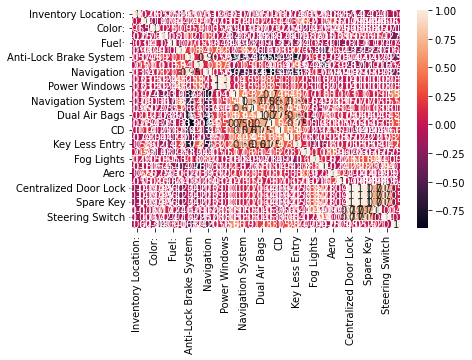

In [866]:
sns.heatmap(df.corr(), annot=True)

In [867]:
positive_top_feature_columns = most_corr['price'][most_corr['price'].values >= 0.5].index.values
positive_top_feature_columns

array(['price', 'Dual Air Bags', 'Anti-Lock Brake', 'Key Less Entry',
       'Year_from_title'], dtype=object)

In [868]:
negative_top_feature_columns = most_corr['price'][most_corr['price'].values <= -0.5].index.values
negative_top_feature_columns

array(['Anti-Lock Brake System', 'Navigation'], dtype=object)

In [869]:
feat_corr = np.concatenate((positive_top_feature_columns, negative_top_feature_columns))
feat_corr

array(['price', 'Dual Air Bags', 'Anti-Lock Brake', 'Key Less Entry',
       'Year_from_title', 'Anti-Lock Brake System', 'Navigation'],
      dtype=object)

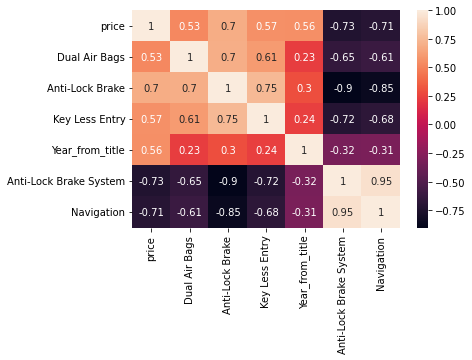

In [870]:
sns.heatmap(df[feat_corr].corr(), annot=True)

# Modelling

First we split the data into training and test set that will be used to evaluate the model

In [871]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Our target variable is the price while all others are the features 

#### Linear Regression

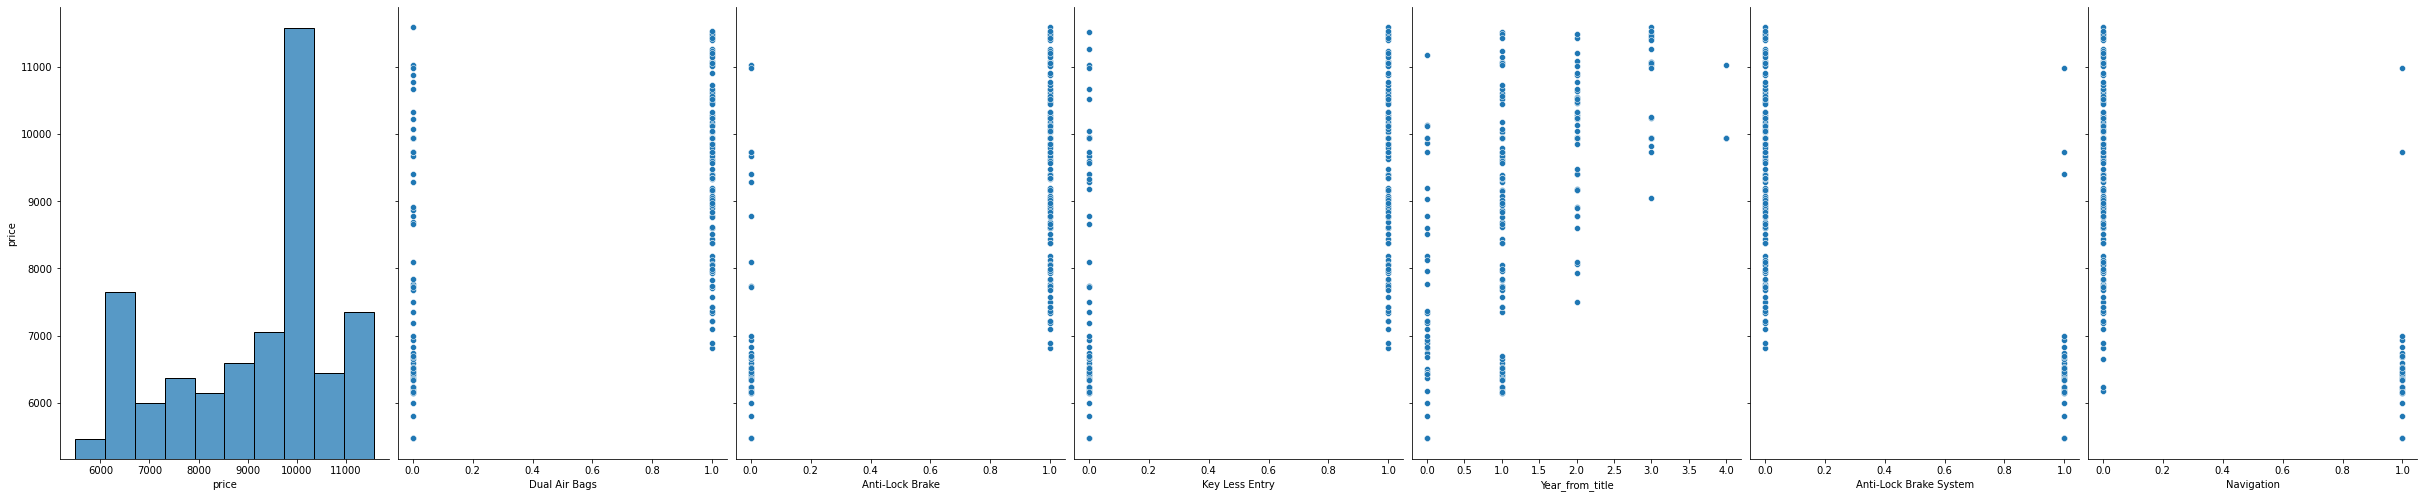

In [872]:
sns.pairplot(df, x_vars=feat_corr, y_vars='price', height=7, aspect=0.7);


In [873]:
def train_model(df,target):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    lr = LinearRegression() 
    lr.fit(X_train, y_train) #training the algorithm
    y_pred = lr.predict(X_test)
    return metrics.r2_score(y_test, y_pred)

In [874]:
train_model(df[feat_corr],'price')

0.6087371058074247

In [877]:
train_model(df,'price')

0.6227644161707822

# Conclusion

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).



---


